In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 讀取 Excel 表
df = pd.read_csv('/Users/ccit0915/Desktop/迴歸分析/全國癌症統計資料-NEW.csv', encoding='utf-8')
df

,Year of Diagnosis,Gender,Region/County,Cancer Type,"Age-Standardized Incidence Rate (per 100,000)",Number of Cancer Cases,Average Age,Median Age,"Crude Rate (per 100,000)"
0,1979,全,全國,口腔、口咽及下咽,3.40,439,53.37,55.0,2.50
1,1979,全,全國,主唾液腺,0.36,49,46.67,47.0,0.28
2,1979,全,全國,鼻咽,7.73,"1,047",46.82,47.0,5.97
3,1979,全,全國,食道,3.16,377,59.23,59.0,2.15
4,1979,全,全國,胃,12.09,"1,471",57.39,59.0,8.39
...,...,...,...,...,...,...,...,...,...
92460,2021,女,連江縣,肺、支氣管及氣管,61.23,5,60.60,65.0,87.18
92461,2021,女,連江縣,女性乳房,27.97,3,59.67,59.0,52.31
92462,2021,女,連江縣,腦,34.38,1,0.00,0.0,17.44
92463,2021,女,連江縣,非何杰金氏淋巴瘤,13.76,1,49.00,49.0,17.44


In [2]:
# 檢查是否有缺失值
missing_values = df.isnull().sum()

# 顯示每個欄位的缺失值數量
print(missing_values)

Year of Diagnosis                                0
Gender                                           0
Region/County                                    0
Cancer Type                                      0
Age-Standardized Incidence Rate (per 100,000)    0
Number of Cancer Cases                           0
Average Age                                      0
Median Age                                       0
Crude Rate (per 100,000)                         0
dtype: int64


In [3]:
#對全國，粗率 (每10萬人口)有超過10的癌症篩選出來分析
filtered_df = df[(df['Region/County'] == '全國') & (df['Crude Rate (per 100,000)'] > 10)]
cancer_types = filtered_df['Cancer Type'].unique()
filtered_df

,Year of Diagnosis,Gender,Region/County,Cancer Type,"Age-Standardized Incidence Rate (per 100,000)",Number of Cancer Cases,Average Age,Median Age,"Crude Rate (per 100,000)"
34,1979,全,全國,全癌症,100.38,"12,978",51.53,54.0,73.98
589,1979,男,全國,胃,16.58,"1,112",57.69,59.0,12.14
592,1979,男,全國,肝及肝內膽管,13.52,974,51.92,53.0,10.63
599,1979,男,全國,肺、支氣管及氣管,16.09,"1,047",59.11,60.0,11.43
623,1979,男,全國,全癌症,106.48,"7,412",53.11,56.0,80.91
...,...,...,...,...,...,...,...,...,...
91699,2021,女,全國,子宮體,17.01,"3,181",56.75,57.0,26.97
91700,2021,女,全國,卵巢、輸卵管及寬韌帶,10.20,"1,793",55.42,55.0,15.20
91708,2021,女,全國,甲狀腺,22.14,"3,497",49.94,50.0,29.64
91714,2021,女,全國,非何杰金氏淋巴瘤,7.09,"1,438",63.87,66.0,12.19


In [4]:
import pandas as pd

# 找出 Cancer Type 列中的唯一值
unique_cancer_types = filtered_df['Cancer Type'].unique()
print(unique_cancer_types)

['全癌症' '胃' '肝及肝內膽管' '肺、支氣管及氣管' '子宮頸' '女性乳房' '結直腸' '口腔、口咽及下咽' '攝護腺' '膀胱'
 '食道' '皮膚' '甲狀腺' '子宮體' '鼻咽' '白血病' '卵巢、輸卵管及寬韌帶' '非何杰金氏淋巴瘤' '胰' '腎']


In [5]:
cancer_type_mapping = {
    '全癌症': 'All Cancers',
    '胃': 'Gastric Cancer',
    '肝及肝內膽管': 'Liver and Intrahepatic Bile Duct Cancer',
    '肺、支氣管及氣管': 'Lung, Bronchus and Trachea Cancer',
    '子宮頸': 'Cervical Cancer',
    '女性乳房': 'Female Breast Cancer',
    '結直腸': 'Colorectal Cancer',
    '口腔、口咽及下咽': 'Oral, Pharyngeal and Hypopharyngeal Cancer',
    '攝護腺': 'Prostate Cancer',
    '膀胱': 'Bladder Cancer',
    '食道': 'Esophageal Cancer',
    '皮膚': 'Skin Cancer',
    '甲狀腺': 'Thyroid Cancer',
    '子宮體': 'Uterine Cancer',
    '鼻咽': 'Nasopharyngeal Cancer',
    '白血病': 'Leukemia',
    '卵巢、輸卵管及寬韌帶': 'Ovarian, Fallopian Tube, and Broad Ligament Cancer',
    '非何杰金氏淋巴瘤': 'Non-Hodgkin Lymphoma',
    '胰': 'Pancreatic Cancer',
    '腎': 'Kidney Cancer'
}

# 使用 .loc 替換 DataFrame 中的 'Cancer Type' 欄位
filtered_df.loc[:, 'Cancer Type'] = filtered_df['Cancer Type'].replace(cancer_type_mapping)

# 檢查替換後的結果
print(filtered_df['Cancer Type'].unique())

['All Cancers' 'Gastric Cancer' 'Liver and Intrahepatic Bile Duct Cancer'
 'Lung, Bronchus and Trachea Cancer' 'Cervical Cancer'
 'Female Breast Cancer' 'Colorectal Cancer'
 'Oral, Pharyngeal and Hypopharyngeal Cancer' 'Prostate Cancer'
 'Bladder Cancer' 'Esophageal Cancer' 'Skin Cancer' 'Thyroid Cancer'
 'Uterine Cancer' 'Nasopharyngeal Cancer' 'Leukemia'
 'Ovarian, Fallopian Tube, and Broad Ligament Cancer'
 'Non-Hodgkin Lymphoma' 'Pancreatic Cancer' 'Kidney Cancer']


/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_89994/1290605955.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Cancer Type'] = filtered_df['Cancer Type'].replace(cancer_type_mapping)


All Cancers: 129 records
Gastric Cancer: 108 records
Liver and Intrahepatic Bile Duct Cancer: 108 records
Lung, Bronchus and Trachea Cancer: 115 records
Cervical Cancer: 43 records
Female Breast Cancer: 41 records
Colorectal Cancer: 109 records
Oral, Pharyngeal and Hypopharyngeal Cancer: 57 records
Prostate Cancer: 26 records
Bladder Cancer: 30 records
Esophageal Cancer: 31 records
Skin Cancer: 49 records
Thyroid Cancer: 33 records
Uterine Cancer: 16 records
Nasopharyngeal Cancer: 9 records
Leukemia: 20 records
Ovarian, Fallopian Tube, and Broad Ligament Cancer: 13 records
Non-Hodgkin Lymphoma: 26 records
Pancreatic Cancer: 18 records
Kidney Cancer: 2 records


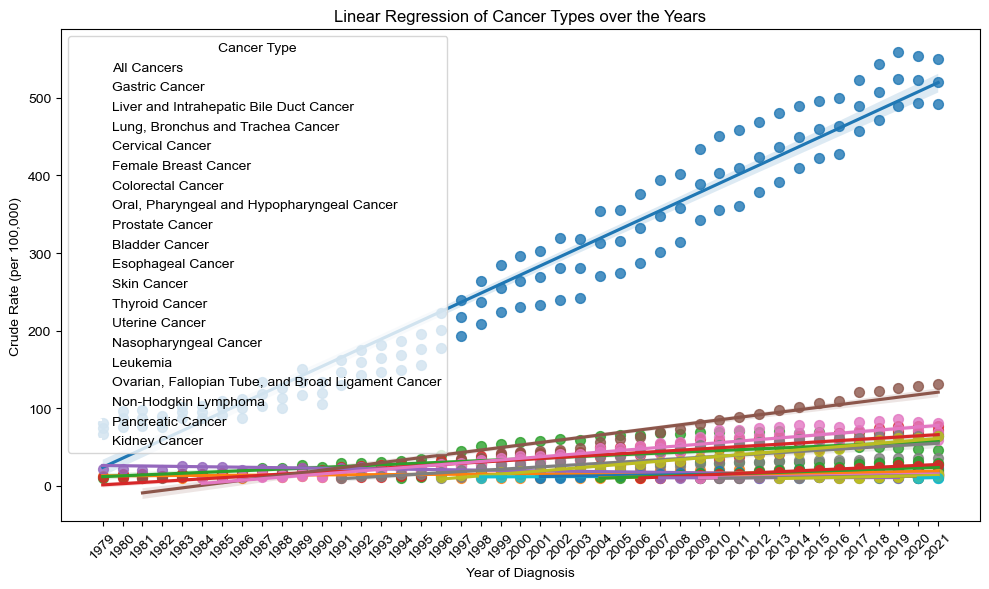

All Cancers: Slope = 11.81, R² = 0.95, p-value = 0.0000, Trend = positive growth
Gastric Cancer: Slope = 0.11, R² = 0.14, p-value = 0.0001, Trend = positive growth
Liver and Intrahepatic Bile Duct Cancer: Slope = 1.08, R² = 0.44, p-value = 0.0000, Trend = positive growth
Lung, Bronchus and Trachea Cancer: Slope = 1.54, R² = 0.82, p-value = 0.0000, Trend = positive growth
Cervical Cancer: Slope = -0.31, R² = 0.57, p-value = 0.0000, Trend = negative growth
Female Breast Cancer: Slope = 3.25, R² = 0.95, p-value = 0.0000, Trend = positive growth
Colorectal Cancer: Slope = 2.02, R² = 0.92, p-value = 0.0000, Trend = positive growth
Oral, Pharyngeal and Hypopharyngeal Cancer: Slope = 1.53, R² = 0.59, p-value = 0.0000, Trend = positive growth
Prostate Cancer: Slope = 2.09, R² = 0.97, p-value = 0.0000, Trend = positive growth
Bladder Cancer: Slope = 0.07, R² = 0.10, p-value = 0.0945, Trend = positive growth
Esophageal Cancer: Slope = 0.32, R² = 0.16, p-value = 0.0243, Trend = positive growth
Sk

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 設定字型和顯示選項
plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號
plt.figure(figsize=(10, 6))

# 獲取唯一的癌症類型
cancer_types = filtered_df['Cancer Type'].unique()

# 繪製每種癌症類型的線性回歸圖
for cancer in cancer_types:
    cancer_df = filtered_df[filtered_df['Cancer Type'] == cancer]
    print(f"{cancer}: {len(cancer_df)} records")  # 檢查每個癌症類型的記錄數
    if not cancer_df.empty:
        sns.regplot(x='Year of Diagnosis', y='Crude Rate (per 100,000)', data=cancer_df, scatter_kws={"s": 50})

# 設置標題和標籤
plt.title('Linear Regression of Cancer Types over the Years')
plt.xlabel('Year of Diagnosis')
plt.ylabel('Crude Rate (per 100,000)')

# 獲取年份範圍，設置X軸刻度
years = np.arange(filtered_df['Year of Diagnosis'].min(), filtered_df['Year of Diagnosis'].max() + 1)
plt.xticks(years, rotation=45)  # 每年顯示一個標籤

# 創建圖例
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cancer, markersize=10) for cancer in cancer_types if cancer in filtered_df['Cancer Type'].values]
plt.legend(title='Cancer Type', handles=handles, loc='upper left')

# 佈局調整
plt.tight_layout()
plt.show()

# 創建一個集合來保存每個癌症類型的斜率、R²、p-value
slope_analysis = {}

for cancer in cancer_types:
    cancer_df = filtered_df[filtered_df['Cancer Type'] == cancer]
    if not cancer_df.empty:
        # 使用scipy.stats.linregress來計算斜率、R²、p-value
        slope, intercept, r_value, p_value, std_err = stats.linregress(cancer_df['Year of Diagnosis'], cancer_df['Crude Rate (per 100,000)'])
        
        # 計算R²
        r_squared = r_value ** 2
        
        # 保存斜率、R²、p-value
        slope_analysis[cancer] = {
            'slope': slope,
            'R²': r_squared,
            'p-value': p_value
        }

# 顯示斜率分析結果
for cancer, values in slope_analysis.items():
    slope = values['slope']
    r_squared = values['R²']
    p_value = values['p-value']
    
    if slope > 0:
        trend = "positive growth"
    elif slope < 0:
        trend = "negative growth"
    else:
        trend = "no growth"
    
    print(f"{cancer}: Slope = {slope:.2f}, R² = {r_squared:.2f}, p-value = {p_value:.4f}, Trend = {trend}")

In [9]:
import pandas as pd

# 建立一個字典來保存癌症類型的分析結果，這次包含中文名稱
cancer_analysis_data = {
    'Cancer Type (Chinese)': [
        '全癌症', '胃', '肝及肝內膽管', '肺、支氣管及氣管', '子宮頸', '女性乳房', '結直腸', '口腔、口咽及下咽', 
        '攝護腺', '膀胱', '食道', '皮膚', '甲狀腺', '子宮體', '鼻咽', '白血病', 
        '卵巢、輸卵管及寬韌帶', '非何杰金氏淋巴瘤', '胰', '腎'
    ],
    'Cancer Type (English)': [
        'All Cancers', 'Gastric Cancer', 'Liver and Intrahepatic Bile Duct Cancer', 
        'Lung, Bronchus and Trachea Cancer', 'Cervical Cancer', 'Female Breast Cancer', 
        'Colorectal Cancer', 'Oral, Pharyngeal and Hypopharyngeal Cancer', 
        'Prostate Cancer', 'Bladder Cancer', 'Esophageal Cancer', 'Skin Cancer', 
        'Thyroid Cancer', 'Uterine Cancer', 'Nasopharyngeal Cancer', 'Leukemia', 
        'Ovarian, Fallopian Tube, and Broad Ligament Cancer', 'Non-Hodgkin Lymphoma', 
        'Pancreatic Cancer', 'Kidney Cancer'
    ],
    'Slope': [
        11.81, 0.11, 1.08, 1.54, -0.31, 3.25, 2.02, 1.53, 2.09, 0.07, 0.32, 
        0.51, 0.83, 1.17, 0.02, 0.21, 0.42, 0.32, 0.50, 0.42
    ],
    'R²': [
        0.95, 0.14, 0.44, 0.82, 0.57, 0.95, 0.92, 0.59, 0.97, 0.10, 0.16, 0.78, 
        0.40, 0.99, 0.26, 0.42, 0.95, 0.52, 0.61, 1.00
    ],
    'p-value': [
        0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 
        0.0945, 0.0243, 0.0000, 0.0001, 0.0000, 0.1641, 0.0020, 0.0000, 0.0000, 
        0.0001, 0.0000
    ],
    'Trend': [
        'positive growth', 'positive growth', 'positive growth', 'positive growth', 
        'negative growth', 'positive growth', 'positive growth', 'positive growth', 
        'positive growth', 'positive growth', 'positive growth', 'positive growth', 
        'positive growth', 'positive growth', 'positive growth', 'positive growth', 
        'positive growth', 'positive growth', 'positive growth', 'positive growth'
    ]
}

# 創建DataFrame
cancer_analysis_df = pd.DataFrame(cancer_analysis_data)

# 顯示表格
print(cancer_analysis_df)

# 如果需要將表格輸出為 CSV 文件
cancer_analysis_df.to_csv('cancer_analysis_summary_zh_en.csv', index=False)

   Cancer Type (Chinese)                              Cancer Type (English)  \
0                    全癌症                                        All Cancers   
1                      胃                                     Gastric Cancer   
2                 肝及肝內膽管            Liver and Intrahepatic Bile Duct Cancer   
3               肺、支氣管及氣管                  Lung, Bronchus and Trachea Cancer   
4                    子宮頸                                    Cervical Cancer   
5                   女性乳房                               Female Breast Cancer   
6                    結直腸                                  Colorectal Cancer   
7               口腔、口咽及下咽         Oral, Pharyngeal and Hypopharyngeal Cancer   
8                    攝護腺                                    Prostate Cancer   
9                     膀胱                                     Bladder Cancer   
10                    食道                                  Esophageal Cancer   
11                    皮膚                            

In [55]:
# 獲取藍色線所代表的癌症類型
blue_cancer = cancer_types[0]
print(f"The blue line represents: {blue_cancer}")

The blue line represents: All Cancers


In [57]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 篩選正成長的癌症類別
positive_growth_cancers = [cancer for cancer, slope in slope_analysis.items() if slope > 0]

Year
2022    10.939987
2023    11.359998
2024    11.780009
2025    12.200020
2026    12.620031
2027    13.040042
2028    13.460053
2029    13.880064
2030    14.300075
dtype: float64


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


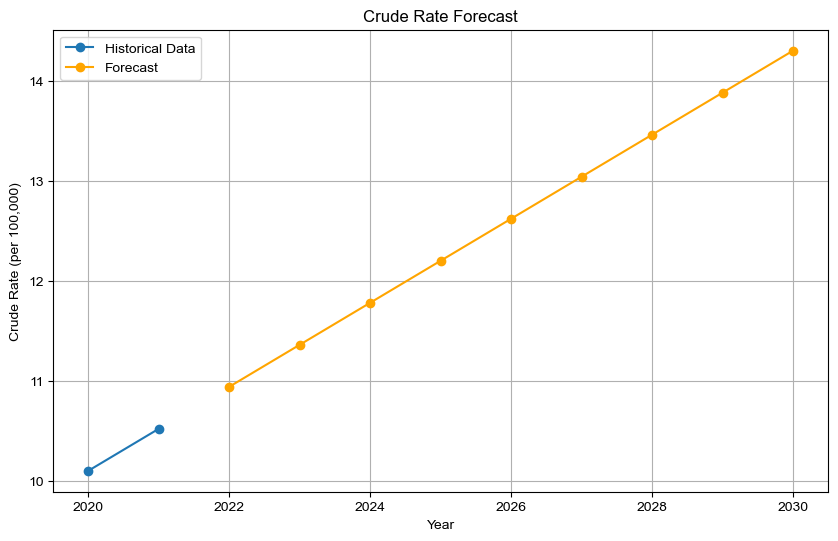

In [61]:
# 使用加法模型進行指數平滑
model = ExponentialSmoothing(yearly_data, trend='add', seasonal=None)
model_fit = model.fit()

# 預測未來9年
forecast = model_fit.forecast(steps=9)

# 設置預測結果的索引
forecast_index = pd.Index(range(yearly_data.index[-1] + 1, yearly_data.index[-1] + 10), name='Year')
forecast = pd.Series(forecast.values, index=forecast_index)

# 預測結果
print(forecast)

# 繪製原始數據和預測結果
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data, marker='o', label='Historical Data')
plt.plot(forecast.index, forecast, marker='o', label='Forecast', color='orange')
plt.title('Crude Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Crude Rate (per 100,000)')
plt.legend()
plt.grid()
plt.show()


In [44]:
# 將 Year of Diagnosis 設定為索引，並計算每年的平均年齡和中位數年齡
age_trends = filtered_df.groupby('Year of Diagnosis').agg(
    Average_Age=('Average Age', 'mean'),
    Median_Age=('Median Age', 'median')
).reset_index()

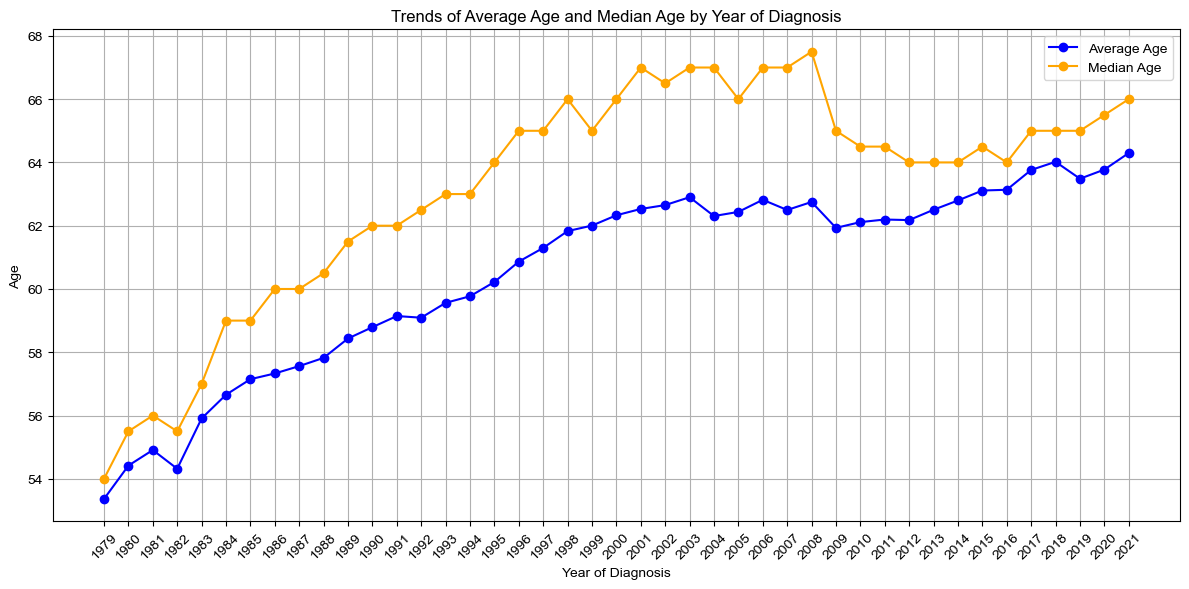

In [45]:
plt.figure(figsize=(12, 6))

# 繪製 Average Age
plt.plot(age_trends['Year of Diagnosis'], age_trends['Average_Age'], marker='o', label='Average Age', color='blue')

# 繪製 Median Age
plt.plot(age_trends['Year of Diagnosis'], age_trends['Median_Age'], marker='o', label='Median Age', color='orange')

# 添加標題和標籤
plt.title('Trends of Average Age and Median Age by Year of Diagnosis')
plt.xlabel('Year of Diagnosis')
plt.ylabel('Age')
plt.xticks(age_trends['Year of Diagnosis'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [46]:
# 線性回歸分析
X = age_trends['Year of Diagnosis']
X = sm.add_constant(X)  # 增加常數項
y_avg = age_trends['Average_Age']
y_med = age_trends['Median_Age']

# 建立模型並擬合
model_avg = sm.OLS(y_avg, X).fit()
model_med = sm.OLS(y_med, X).fit()

# 顯示結果
print('Average Age Regression Results:')
print(model_avg.summary())
print('\nMedian Age Regression Results:')
print(model_med.summary())

Average Age Regression Results:
                            OLS Regression Results                            
Dep. Variable:            Average_Age   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     250.9
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.45e-19
Time:                        13:17:08   Log-Likelihood:                -65.510
No. Observations:                  43   AIC:                             135.0
Df Residuals:                      41   BIC:                             138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const 

In [108]:
# 計算每年按性別細分的癌症病例數
filtered_df['Number of Cancer Cases'] = filtered_df['Number of Cancer Cases'].str.replace(',', '').astype(int)
cases_by_year_and_gender = filtered_df[filtered_df['Gender'] != '全'].groupby(['Year of Diagnosis', 'Gender'])['Number of Cancer Cases'].sum().unstack()
cases_by_year_and_gender = cases_by_year_and_gender.reset_index()
print(cases_by_year_and_gender)

Gender  Year of Diagnosis       女       男
0                    1979    7358   10545
1                    1980    8346   12810
2                    1981    9381   13311
3                    1982    9391   12259
4                    1983   11284   14268
5                    1984   11300   15768
6                    1985   11934   16887
7                    1986   11281   17623
8                    1987   14254   21192
9                    1988   14239   20201
10                   1989   16429   24314
11                   1990   15061   21811
12                   1991   19831   27702
13                   1992   21916   30248
14                   1993   22715   31431
15                   1994   24360   32702
16                   1995   25787   34518
17                   1996   29758   40966
18                   1997   34038   44659
19                   1998   36846   51134
20                   1999   40135   55551
21                   2000   41670   58088
22                   2001   42335 

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_70114/2995936937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Number of Cancer Cases'] = filtered_df['Number of Cancer Cases'].str.replace(',', '').astype(int)


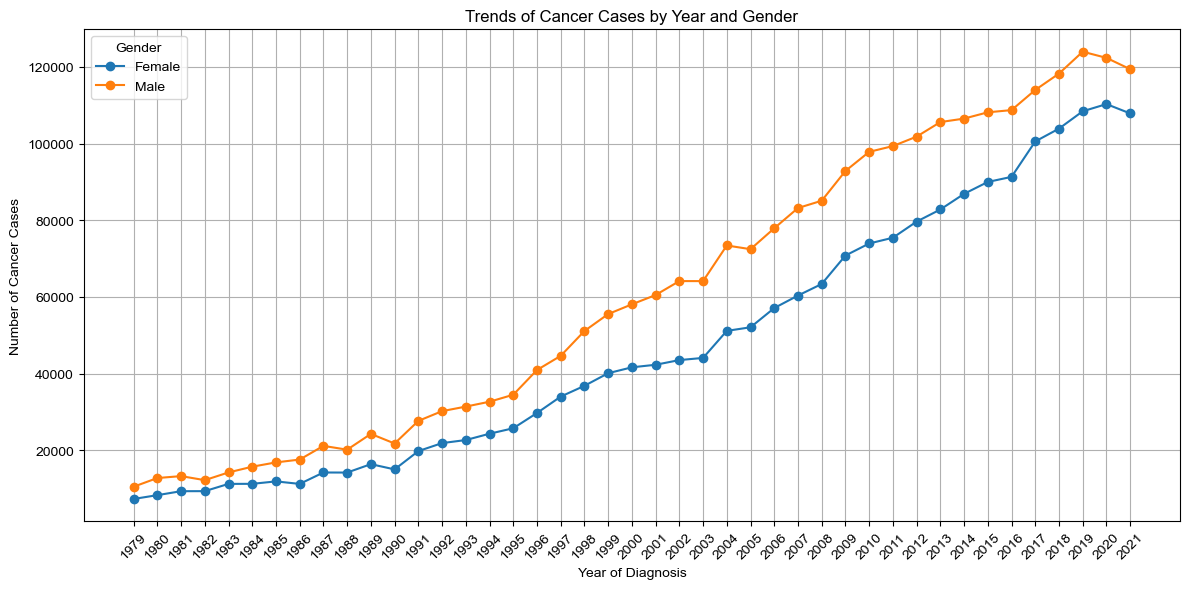

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 繪製每個性別的病例數，並替換標籤為 "Male" 和 "Female"
gender_labels = {'女': 'Female', '男': 'Male'}

for gender in cases_by_year_and_gender.columns[1:]:  # 排除第一列（Year of Diagnosis）
    plt.plot(cases_by_year_and_gender['Year of Diagnosis'], cases_by_year_and_gender[gender], marker='o', label=gender_labels[gender])

# 添加標題和標籤
plt.title('Trends of Cancer Cases by Year and Gender')
plt.xlabel('Year of Diagnosis')
plt.ylabel('Number of Cancer Cases')
plt.xticks(cases_by_year_and_gender['Year of Diagnosis'], rotation=45)
plt.legend(title='Gender')  # 添加圖例標題
plt.grid()
plt.tight_layout()
plt.show()

   Gender  Average Age Mean  Average Age Median  Median Age Mean  \
0  female         59.510875               59.39        60.053125   
1    male         63.115627               63.54        64.194667   

   Median Age Median  
0               60.0  
1               65.0  


/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_70114/4091354363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gender_df['Gender'] = filtered_gender_df['Gender'].replace({'男': 'male', '女': 'female'})


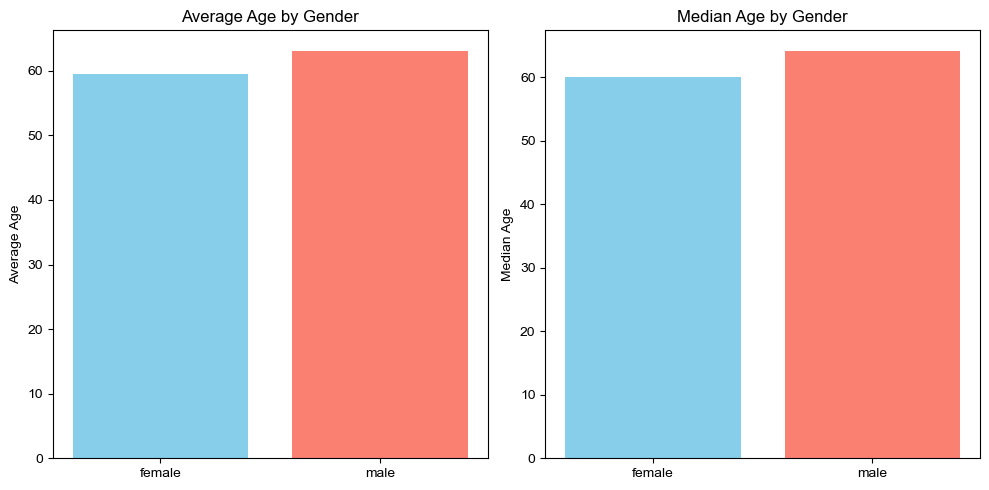

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 filtered_df
# 排除 '全' 性別的資料
filtered_gender_df = filtered_df[filtered_df['Gender'] != '全']
filtered_gender_df['Gender'] = filtered_gender_df['Gender'].replace({'男': 'male', '女': 'female'})
# 選擇需要的欄位
age_gender_df = filtered_gender_df[['Gender', 'Average Age', 'Median Age']]


# 計算每個性別的平均年齡和中位數年齡
age_summary = age_gender_df.groupby('Gender').agg({
    'Average Age': ['mean', 'median'],
    'Median Age': ['mean', 'median']
}).reset_index()

# 重命名列
age_summary.columns = ['Gender', 'Average Age Mean', 'Average Age Median', 'Median Age Mean', 'Median Age Median']

print(age_summary)

# 繪製每個性別的平均年齡和中位數年齡
plt.figure(figsize=(10, 5))

# 繪製平均年齡
plt.subplot(1, 2, 1)
plt.bar(age_summary['Gender'], age_summary['Average Age Mean'], color=['skyblue', 'salmon'])
plt.title('Average Age by Gender')
plt.ylabel('Average Age')

# 繪製中位數年齡
plt.subplot(1, 2, 2)
plt.bar(age_summary['Gender'], age_summary['Median Age Mean'], color=['skyblue', 'salmon'])
plt.title('Median Age by Gender')
plt.ylabel('Median Age')

plt.tight_layout()
plt.show()

  Age Group  Gender  Average Age Mean  Average Age Median  Median Age Mean  \
0      0-20  female               NaN                 NaN              NaN   
1      0-20    male               NaN                 NaN              NaN   
2     21-40  female               NaN                 NaN              NaN   
3     21-40    male               NaN                 NaN              NaN   
4     41-60  female         53.483012              53.595        53.234940   
5     41-60    male         56.123333              57.030        56.816667   
6     61-80  female         66.008442              65.830        67.402597   
7     61-80    male         66.406118              66.240        67.666667   
8    81-100  female               NaN                 NaN              NaN   
9    81-100    male               NaN                 NaN              NaN   

   Median Age Median  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4               54.0  
5  

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_70114/976838733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gender_df['Age Group'] = pd.cut(filtered_gender_df['Average Age'], bins=bins, labels=labels, right=True)


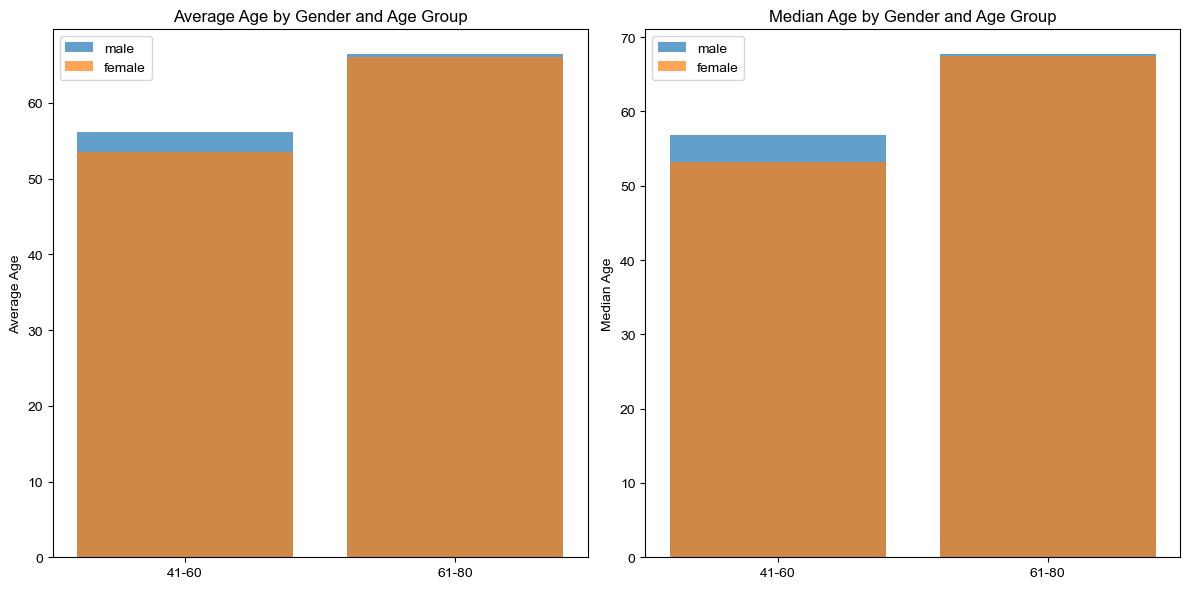

In [116]:
# 定義年齡範圍分組 (0-20, 21-40, 41-60, 61-80, 81-100)
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# 添加一個新的欄位，將年齡分到對應的年齡範圍
filtered_gender_df['Age Group'] = pd.cut(filtered_gender_df['Average Age'], bins=bins, labels=labels, right=True)

# 選擇需要的欄位
age_gender_df = filtered_gender_df[['Gender', 'Average Age', 'Median Age', 'Age Group']]

# 計算每個年齡範圍和性別的平均年齡和中位數年齡
age_summary = age_gender_df.groupby(['Age Group', 'Gender']).agg({
    'Average Age': ['mean', 'median'],
    'Median Age': ['mean', 'median']
}).reset_index()

# 重命名列
age_summary.columns = ['Age Group', 'Gender', 'Average Age Mean', 'Average Age Median', 'Median Age Mean', 'Median Age Median']

print(age_summary)

# 繪製每個年齡範圍內的男性和女性平均年齡和中位數年齡
plt.figure(figsize=(12, 6))

# 繪製平均年齡的條形圖
plt.subplot(1, 2, 1)
for gender in ['male', 'female']:
    plt.bar(age_summary[age_summary['Gender'] == gender]['Age Group'],
            age_summary[age_summary['Gender'] == gender]['Average Age Mean'],
            label=gender, alpha=0.7)
plt.title('Average Age by Gender and Age Group')
plt.ylabel('Average Age')
plt.legend()

# 繪製中位數年齡的條形圖
plt.subplot(1, 2, 2)
for gender in ['male', 'female']:
    plt.bar(age_summary[age_summary['Gender'] == gender]['Age Group'],
            age_summary[age_summary['Gender'] == gender]['Median Age Mean'],
            label=gender, alpha=0.7)
plt.title('Median Age by Gender and Age Group')
plt.ylabel('Median Age')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
# 檢查每個年齡範圍內的數據數量
age_group_counts = filtered_gender_df['Age Group'].value_counts()
print(age_group_counts)

61-80     409
41-60     286
0-20        0
21-40       0
81-100      0
Name: Age Group, dtype: int64


In [4]:
filtered_gender_df = filtered_df[filtered_df['Gender'] != '全']
filtered_gender_df['Gender'] = filtered_gender_df['Gender'].replace({'男': 'male', '女': 'female'})

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_89059/2453198361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gender_df['Gender'] = filtered_gender_df['Gender'].replace({'男': 'male', '女': 'female'})


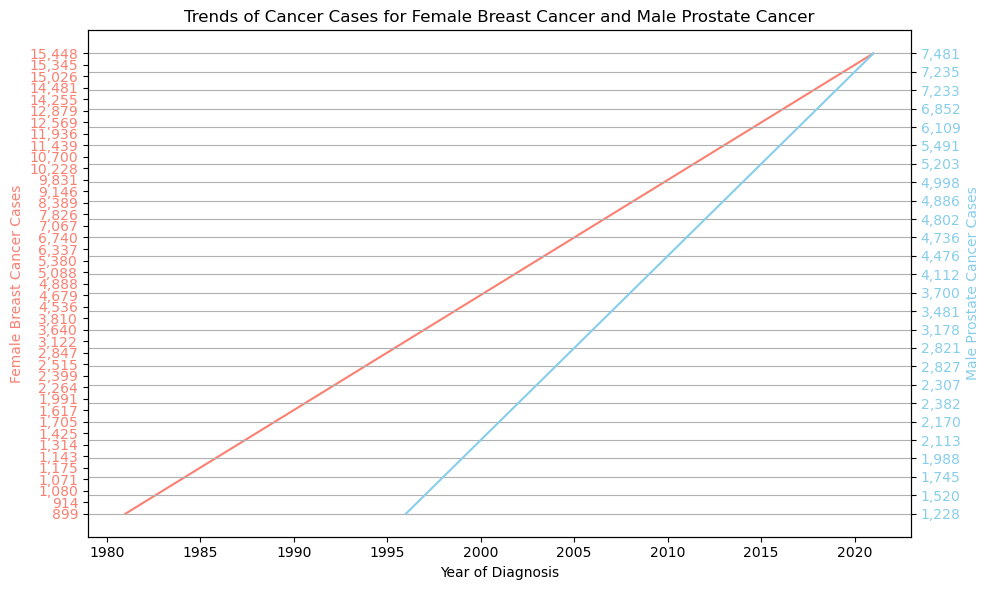

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 篩選出女性乳癌和男性攝護腺癌的資料
breast_cancer_female = filtered_gender_df[(filtered_gender_df['Cancer Type'] == '女性乳房') & (filtered_gender_df['Gender'] == 'female')]
prostate_cancer_male = filtered_gender_df[(filtered_gender_df['Cancer Type'] == '攝護腺') & (filtered_gender_df['Gender'] == 'male')]

# 將資料根據診斷年份進行分組，計算每年的發病人數
breast_cancer_female_trend = breast_cancer_female.groupby('Year of Diagnosis')['Number of Cancer Cases'].sum().reset_index()
prostate_cancer_male_trend = prostate_cancer_male.groupby('Year of Diagnosis')['Number of Cancer Cases'].sum().reset_index()

# 繪製發病人數趨勢圖，雙Y軸
fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製女性乳癌趨勢
ax1.plot(breast_cancer_female_trend['Year of Diagnosis'], breast_cancer_female_trend['Number of Cancer Cases'], color='salmon', label='Female Breast Cancer')
ax1.set_xlabel('Year of Diagnosis')
ax1.set_ylabel('Female Breast Cancer Cases', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')

# 建立第二個Y軸，繪製男性攝護腺癌趨勢
ax2 = ax1.twinx()
ax2.plot(prostate_cancer_male_trend['Year of Diagnosis'], prostate_cancer_male_trend['Number of Cancer Cases'], color='skyblue', label='Male Prostate Cancer')
ax2.set_ylabel('Male Prostate Cancer Cases', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

plt.title('Trends of Cancer Cases for Female Breast Cancer and Male Prostate Cancer')
fig.tight_layout()
plt.grid(True)
plt.show()

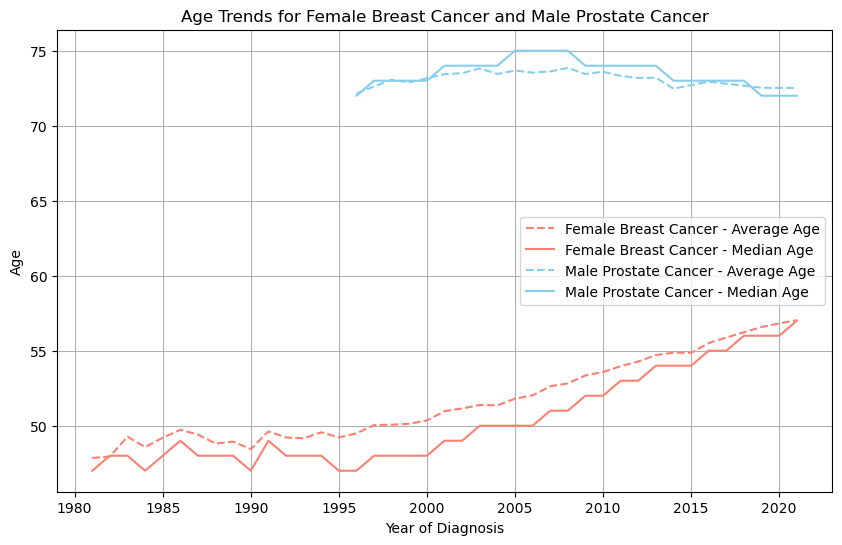

In [9]:
# 女性乳癌年齡趨勢
breast_cancer_female_age_trend = breast_cancer_female.groupby('Year of Diagnosis').agg({
    'Average Age': 'mean', 
    'Median Age': 'median'
}).reset_index()

# 男性攝護腺癌年齡趨勢
prostate_cancer_male_age_trend = prostate_cancer_male.groupby('Year of Diagnosis').agg({
    'Average Age': 'mean', 
    'Median Age': 'median'
}).reset_index()

# 繪製年齡趨勢圖
plt.figure(figsize=(10, 6))

# 女性乳癌年齡趨勢
plt.plot(breast_cancer_female_age_trend['Year of Diagnosis'], breast_cancer_female_age_trend['Average Age'], label='Female Breast Cancer - Average Age', color='salmon', linestyle='--')
plt.plot(breast_cancer_female_age_trend['Year of Diagnosis'], breast_cancer_female_age_trend['Median Age'], label='Female Breast Cancer - Median Age', color='salmon')

# 男性攝護腺癌年齡趨勢
plt.plot(prostate_cancer_male_age_trend['Year of Diagnosis'], prostate_cancer_male_age_trend['Average Age'], label='Male Prostate Cancer - Average Age', color='skyblue', linestyle='--')
plt.plot(prostate_cancer_male_age_trend['Year of Diagnosis'], prostate_cancer_male_age_trend['Median Age'], label='Male Prostate Cancer - Median Age', color='skyblue')

plt.title('Age Trends for Female Breast Cancer and Male Prostate Cancer')
plt.xlabel('Year of Diagnosis')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()